In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import GridSearchCV,cross_val_score, train_test_split

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
forest_data = pd.read_csv('forestfires.csv')
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forest_data.shape

(517, 31)

In [5]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
forest_data.month.value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

In [7]:
forest_data.isnull().any()

month            False
day              False
FFMC             False
DMC              False
DC               False
ISI              False
temp             False
RH               False
wind             False
rain             False
area             False
dayfri           False
daymon           False
daysat           False
daysun           False
daythu           False
daytue           False
daywed           False
monthapr         False
monthaug         False
monthdec         False
monthfeb         False
monthjan         False
monthjul         False
monthjun         False
monthmar         False
monthmay         False
monthnov         False
monthoct         False
monthsep         False
size_category    False
dtype: bool

In [10]:
le = LabelEncoder()
forest_data['month'] = le.fit_transform(forest_data.month)
forest_data['day'] = le.fit_transform(forest_data['day'])

In [13]:
forest_data.drop(forest_data.iloc[:,10:30],axis=1,inplace=True)

In [14]:
forest_data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,small
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,small
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,small
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,small
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,small


In [15]:
forest_data.shape

(517, 11)

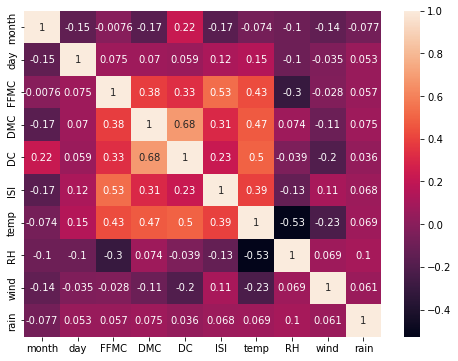

In [16]:
corr_matrix = forest_data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix,annot=True)
plt.show()

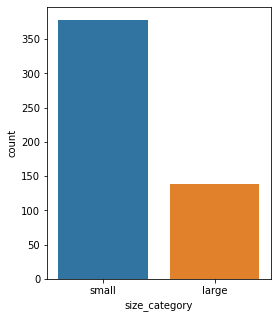

In [17]:
plt.figure(figsize=(4,5))
sns.countplot(forest_data.size_category)
plt.show()

In [18]:
x = forest_data.drop('size_category',axis=1)
y = forest_data[['size_category']]

In [19]:
scale = StandardScaler()
std = scale.fit_transform(x)
x_std = pd.DataFrame(std,columns=x.columns)
x_std

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,0.284222,-1.423121,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,0.970871,1.176715,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,0.970871,-0.383187,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,0.284222,-1.423121,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,0.284222,0.136781,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268
...,...,...,...,...,...,...,...,...,...,...
512,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268
513,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268
514,-1.089076,0.136781,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268
515,-1.089076,-0.383187,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268


In [20]:
train_x,test_x,train_y,test_y = train_test_split(x_std,y,test_size=.20,random_state=0)

In [21]:
train_x.shape,train_y.shape

((413, 10), (413, 1))

In [22]:
test_x.shape,test_y.shape

((104, 10), (104, 1))

### Hyperparameter Tuning

In [23]:
clf = SVC()
param_grid = [{
    'kernel':[ 'rbf','poly','linear'],
    'C':[10,20,30,40,50,60,70,80,90,100],
    'gamma': [0.5,0.1,0.01]
    
}]
gscv = GridSearchCV(clf,cv=10,param_grid=param_grid)
gscv.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                          'gamma': [0.5, 0.1, 0.01],
                          'kernel': ['rbf', 'poly', 'linear']}])

In [25]:
gscv.best_params_,gscv.best_score_

({'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, 0.7481997677119627)

In [26]:
param_grid = [{
    'kernel' : ['rbf'],
    'C' : [25,26,27,28,29,30],
    'gamma' : [0.001,0.02,0.009,0.01]
}]
gscv = GridSearchCV(clf,param_grid,cv=10)
gscv.fit(train_x,train_y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [25, 26, 27, 28, 29, 30],
                          'gamma': [0.001, 0.02, 0.009, 0.01],
                          'kernel': ['rbf']}])

In [24]:
gscv.best_params_,gscv.best_score_

({'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}, 0.7481997677119627)

In [27]:
model = SVC(C=27,gamma=0.01,kernel='rbf')
model.fit(train_x,train_y)

SVC(C=27, gamma=0.01)

In [28]:
train_y_pred = model.predict(train_x)
print('Train Accuracy = ',accuracy_score(train_y,train_y_pred)*100)

Train Accuracy =  75.06053268765133


In [29]:
print('Confusion Matrix :\n',confusion_matrix(train_y,train_y_pred))
print('Classification Report :\n',classification_report(train_y,train_y_pred))

Confusion Matrix :
 [[  6 103]
 [  0 304]]
Classification Report :
               precision    recall  f1-score   support

       large       1.00      0.06      0.10       109
       small       0.75      1.00      0.86       304

    accuracy                           0.75       413
   macro avg       0.87      0.53      0.48       413
weighted avg       0.81      0.75      0.66       413



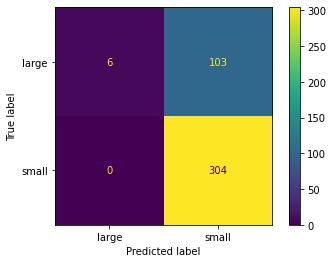

In [30]:
plot_confusion_matrix(model,train_x,train_y)

In [31]:
test_y_pred = model.predict(test_x)
print('Test Accuracy = ',accuracy_score(test_y,test_y_pred)*100)

Test Accuracy =  72.11538461538461


In [32]:
print('Confusion Matrix :\n',confusion_matrix(test_y,test_y_pred))
print('Classification Report :\n',classification_report(test_y,test_y_pred))

Confusion Matrix :
 [[ 1 29]
 [ 0 74]]
Classification Report :
               precision    recall  f1-score   support

       large       1.00      0.03      0.06        30
       small       0.72      1.00      0.84        74

    accuracy                           0.72       104
   macro avg       0.86      0.52      0.45       104
weighted avg       0.80      0.72      0.61       104



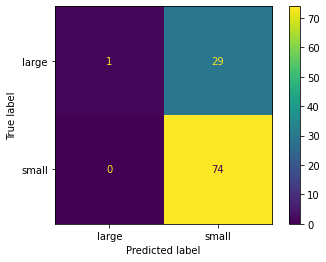

In [33]:
plot_confusion_matrix(model,test_x,test_y)
plt.show()